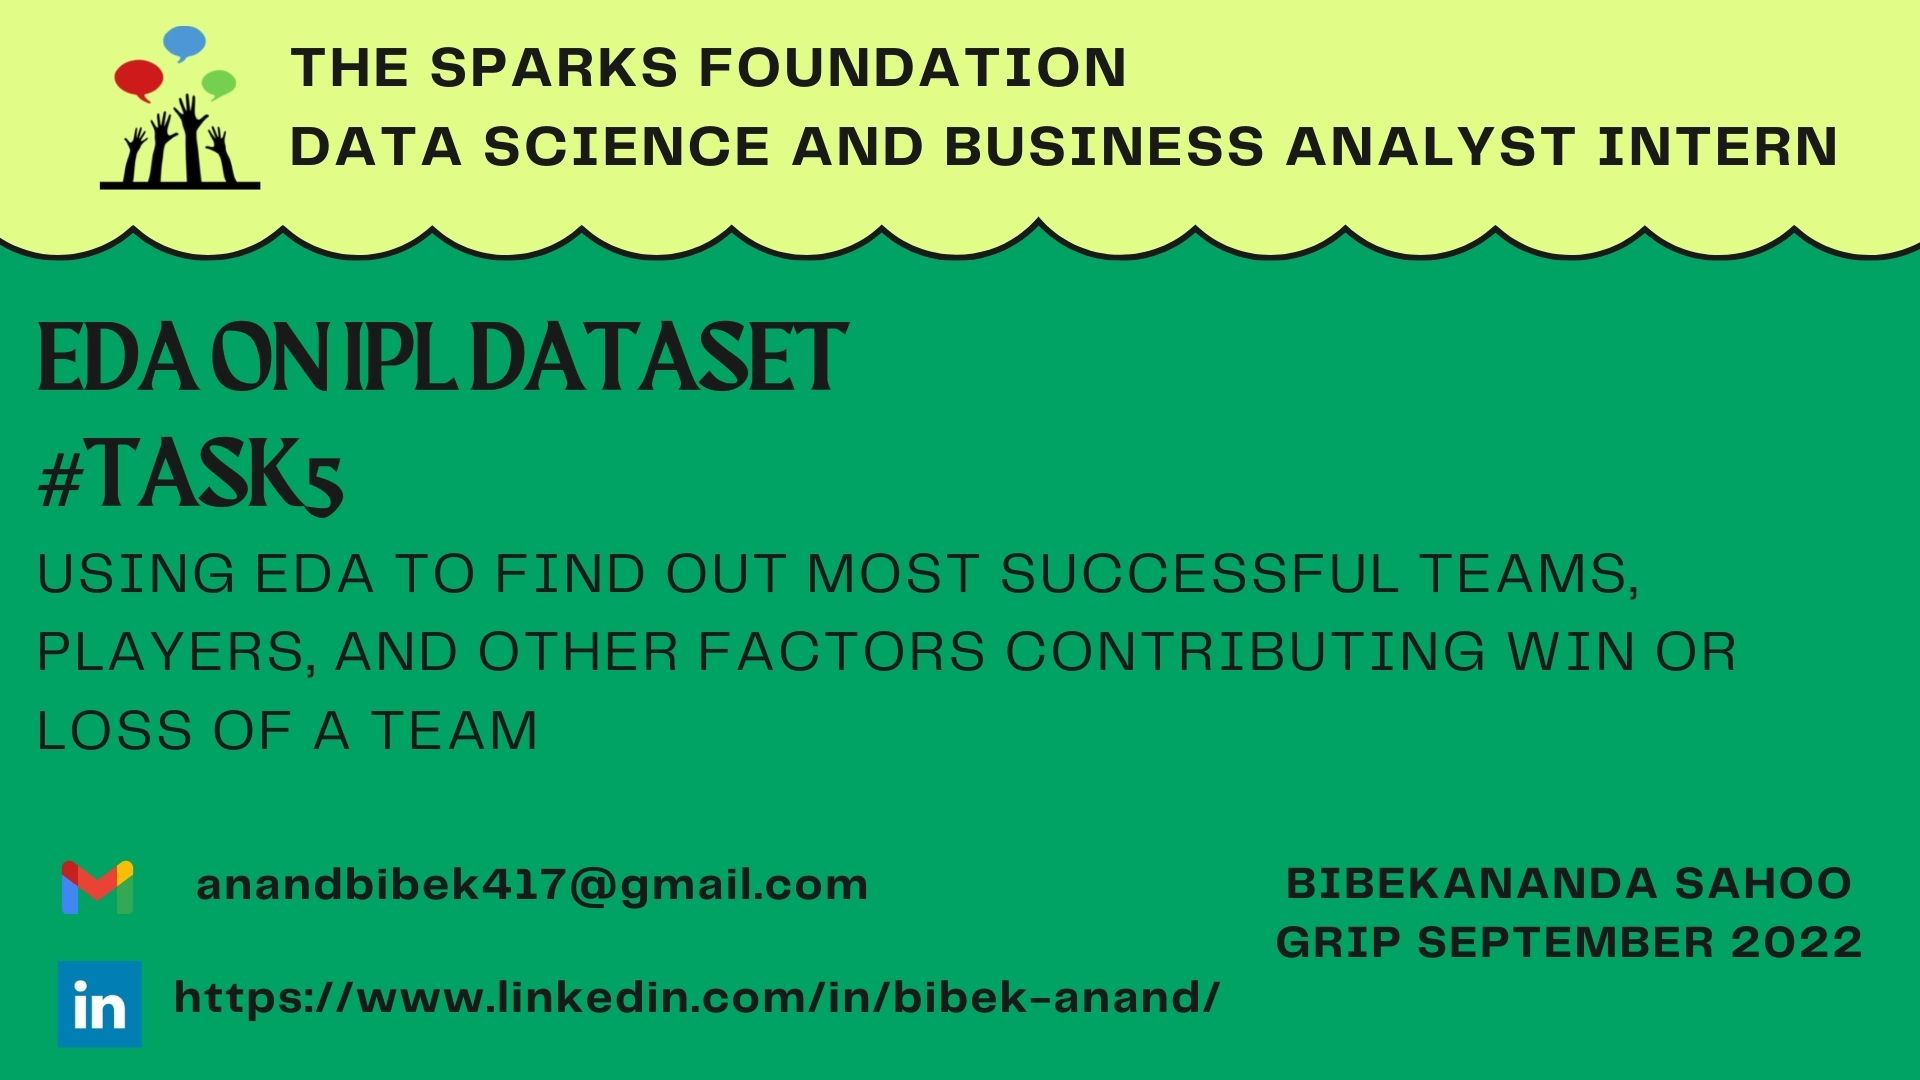

In [1]:
#importing the important libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
matches = pd.read_csv('E:\spark foundation\Indian Premier League\matches.csv') 
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,04-May-17,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,04-Jun-17,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,04-Jul-17,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,04-Aug-17,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,04-Aug-17,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
matches.shape

(756, 18)

# Data Cleaning or Preprocessing

In [4]:
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [5]:
round((matches.isnull().sum()/matches.shape[0])*100,2)

id                  0.00
season              0.00
city                0.93
date                0.00
team1               0.00
team2               0.00
toss_winner         0.00
toss_decision       0.00
result              0.00
dl_applied          0.00
winner              0.53
win_by_runs         0.00
win_by_wickets      0.00
player_of_match     0.53
venue               0.00
umpire1             0.26
umpire2             0.26
umpire3            84.26
dtype: float64

In [6]:
#dropping umpire3 column because its having more than 80% missing data
# also dropping id column because its just a unique identifier column
matches.drop(['id','umpire3'],axis=1,inplace=True)
matches.shape

(756, 16)

In [7]:
# dropping rows having null value in winner, player_of_match and city.
matches = matches[~((matches.winner.isnull())|(matches.player_of_match.isnull())|(matches.city.isnull())|(matches.umpire1.isnull()))]

In [8]:
matches.shape

(743, 16)

In [9]:
# lets check again the null value counts
matches.isnull().sum()

season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

In [10]:
matches.head(3)

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,2017,Hyderabad,04-May-17,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2017,Pune,04-Jun-17,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,2017,Rajkot,04-Jul-17,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan


In [11]:
matches.dtypes

season              int64
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
umpire1            object
umpire2            object
dtype: object

In [12]:
# chage the data type of date to datetime format
matches.date = pd.to_datetime(matches.date)

In [13]:
matches.dtypes

season                      int64
city                       object
date               datetime64[ns]
team1                      object
team2                      object
toss_winner                object
toss_decision              object
result                     object
dl_applied                  int64
winner                     object
win_by_runs                 int64
win_by_wickets              int64
player_of_match            object
venue                      object
umpire1                    object
umpire2                    object
dtype: object

In [14]:
matches = matches.sort_values('date').reset_index(drop=True)
matches.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,2008,Hyderabad,2008-01-05,Deccan Chargers,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,7,SE Marsh,"Rajiv Gandhi International Stadium, Uppal",BR Doctrove,RB Tiffin
1,2008,Jaipur,2008-01-05,Rajasthan Royals,Kolkata Knight Riders,Rajasthan Royals,bat,normal,0,Rajasthan Royals,45,0,SA Asnodkar,Sawai Mansingh Stadium,RE Koertzen,GA Pratapkumar
2,2008,Mumbai,2008-01-06,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,Dr DY Patil Sports Academy,BF Bowden,RE Koertzen
3,2008,Chennai,2008-02-05,Chennai Super Kings,Delhi Daredevils,Chennai Super Kings,bat,normal,0,Delhi Daredevils,0,8,V Sehwag,"MA Chidambaram Stadium, Chepauk",BF Bowden,K Hariharan
4,2008,Bangalore,2008-03-05,Royal Challengers Bangalore,Deccan Chargers,Deccan Chargers,field,normal,0,Royal Challengers Bangalore,3,0,P Kumar,M Chinnaswamy Stadium,BR Doctrove,SL Shastri


In [15]:
# lets check the unique values for categorical columns 
columns = ['umpire2','venue','toss_decision','result','city','team1','season'] 
for i in columns:
    print(f'Column_name-> {i}')
    print(matches[i].unique())
    print('*'*100)

Column_name-> umpire2
['RB Tiffin' 'GA Pratapkumar' 'RE Koertzen' 'K Hariharan' 'SL Shastri'
 'I Shivram' 'AV Jayaprakash' 'DJ Harper' 'AM Saheba' 'MR Benson'
 'IL Howell' 'BR Doctrove' 'SJ Davis' 'BG Jerling' 'SK Tarapore' 'S Ravi'
 'TH Wijewardene' 'M Erasmus' 'SD Ranade' 'SJA Taufel' 'HDPK Dharmasena'
 'SS Hazare' 'PR Reiffel' 'RJ Tucker' 'AL Hill' 'AK Chaudhary'
 'C Shamshuddin' 'S Asnani' 'BNJ Oxenford' 'S Das' 'VA Kulkarni'
 'JD Cloete' 'CK Nandan' 'K Srinath' 'NJ Llong' 'Subroto Das'
 'RK Illingworth' 'PG Pathak' 'K Srinivasan' 'CB Gaffaney' 'SD Fry'
 'VK Sharma' 'A Nand Kishore' 'Nitin Menon' 'A Deshmukh' 'A Nanda Kishore'
 'K Ananthapadmanabhan' 'A.D Deshmukh' 'Vineet Kulkarni' 'Chris Gaffaney'
 'Rod Tucker' 'Nigel Llong' 'Anil Chaudhary' 'O Nandan'
 'Virender Kumar Sharma' 'Yeshwant Barde' 'Anil Dandekar'
 'Kumar Dharmasena' 'KN Anantapadmanabhan' 'Ulhas Gandhe' 'Nanda Kishore'
 'Bruce Oxenford' 'Nand Kishore' 'KN Ananthapadmanabhan' 'Ian Gould']
*****************************

In [16]:
# replace 'Bangalore', 'Bengaluru' to 'Bangalore' 
matches.city = matches.city.replace(['Bangalore', 'Bengaluru'],'Bangalore')
# replace 'Rising Pune Supergiant', 'Rising Pune Supergiants' to 'Rising Pune Supergiants' 
columns = ['team1','team2','toss_winner','winner']
for i in columns:
    matches[i] = matches[i].replace(['Rising Pune Supergiant', 'Rising Pune Supergiants'],'Rising Pune Supergiants')

In [17]:
# cleaning venue column 
matches.venue = matches.venue.replace(['M. Chinnaswamy Stadium','M Chinnaswamy Stadium'],'M Chinnaswamy Stadium')
matches.venue = matches.venue.replace(['MA Chidambaram Stadium, Chepauk','M. A. Chidambaram Stadium'],'MA Chidambaram Stadium, Chepauk')
matches.venue = matches.venue.replace(['Feroz Shah Kotla Ground' , 'Feroz Shah Kotla'],'Feroz Shah Kotla')
matches.venue = matches.venue.replace(['Rajiv Gandhi Intl. Cricket Stadium' , 'Rajiv Gandhi International Stadium, Uppal'],'Rajiv Gandhi Intl. Cricket Stadium')
matches.venue = matches.venue.replace(['IS Bindra Stadium','Punjab Cricket Association IS Bindra Stadium, Mohali','Punjab Cricket Association Stadium, Mohali'],'Punjab Cricket Association Stadium, Mohali')
matches.venue = matches.venue.replace(['Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium', 'ACA-VDCA Stadium'],'ACA-VDCA Stadium')


In [18]:
# cleaning umpire column
columns = ['umpire1','umpire2']
for i in columns:
    matches[i] = matches[i].replace(['K Ananthapadmanabhan','KN Ananthapadmanabhan'],'K Ananthapadmanabhan')
    matches[i] = matches[i].replace(['A Nanda Kishore','A Nand Kishore','Nanda Kishore'],'A Nanda Kishore')
    matches[i] = matches[i].replace(['VA Kulkarni','Vineet Kulkarni'],'VA Kulkarni')
    matches[i] = matches[i].replace(['HDPK Dharmasena','Kumar Dharmasena'],'Kumar Dharmasena')
    matches[i] = matches[i].replace(['Nigel Llong','NJ Llong'],'Nigel Llong')
    

# Exploratoty Data Analysis 



2013    76
2012    74
2011    72
2010    60
2016    60
2018    60
2008    58
2017    58
2019    58
2009    57
2015    57
2014    53
Name: season, dtype: int64


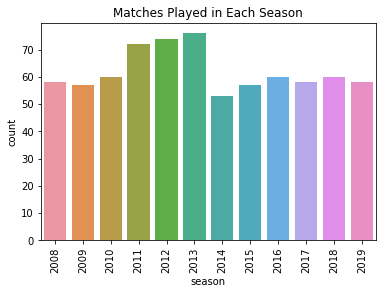

In [19]:
# lets do a unique count of seasons 
print(matches.season.value_counts())
sns.countplot(data=matches,x='season')
plt.title('Matches Played in Each Season')
plt.xticks(rotation=90)
plt.show()

In [20]:
# Average Matche Played in Each Season
round(np.mean(matches.season.value_counts()),2)

61.92

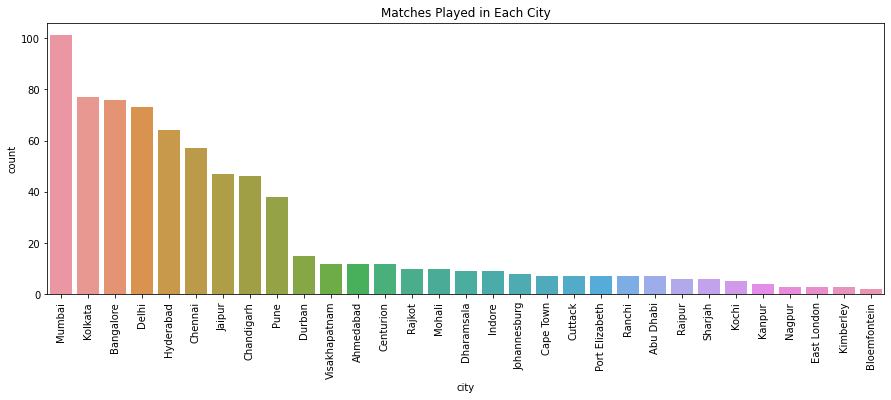

In [21]:
plt.figure(figsize=[15,5])
sns.countplot(data=matches,x='city',order = matches['city'].value_counts().index)
plt.title('Matches Played in Each City')
plt.xticks(rotation=90)
plt.show()

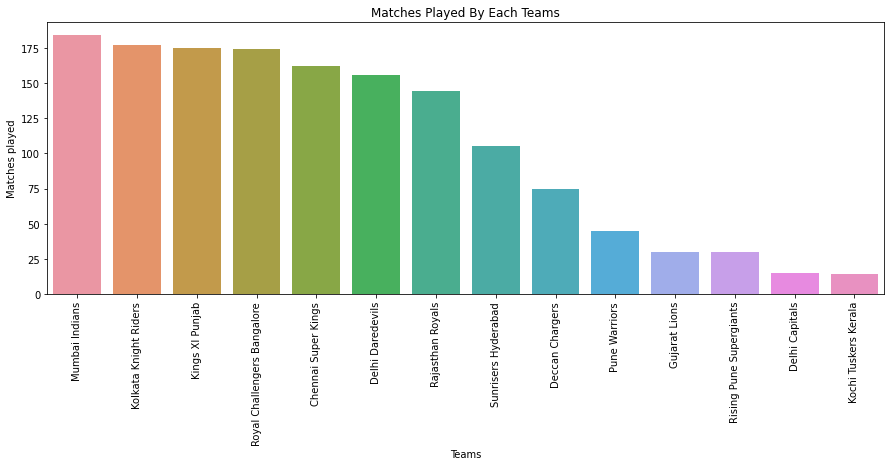

In [22]:
data = pd.DataFrame((matches.team1.value_counts()+matches.team2.value_counts())).reset_index()
data.columns = ['Teams','Matches played']
plt.figure(figsize=[15,5])
sns.barplot(data=data.sort_values('Matches played',ascending=False),x='Teams',y='Matches played')
plt.title('Matches Played By Each Teams')
plt.xticks(rotation=90)
plt.show()

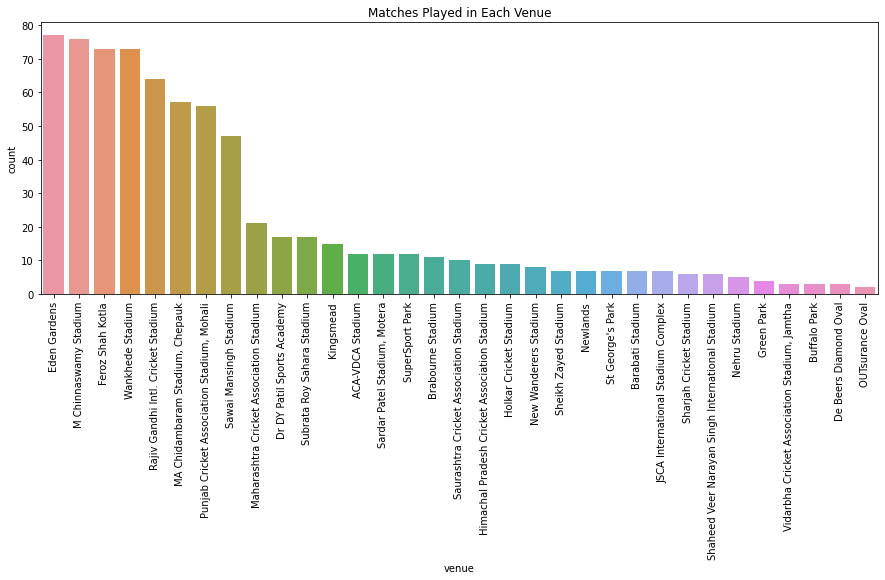

In [23]:
plt.figure(figsize=[15,5])
sns.countplot(data=matches,x='venue',order = matches['venue'].value_counts().index)
plt.title('Matches Played in Each Venue')
plt.xticks(rotation=90)
plt.show()

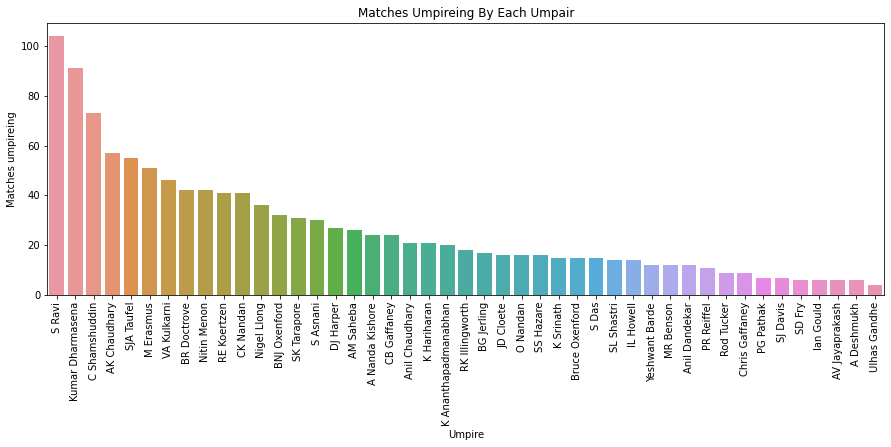

In [24]:
data = pd.DataFrame((matches.umpire1.value_counts()+matches.umpire2.value_counts())).reset_index()
data.columns = ['Umpire','Matches umpireing']
plt.figure(figsize=[15,5])
sns.barplot(data=data.dropna().sort_values('Matches umpireing',ascending=False),x='Umpire',y='Matches umpireing')
plt.title('Matches Umpireing By Each Umpair')
plt.xticks(rotation=90)
plt.show()

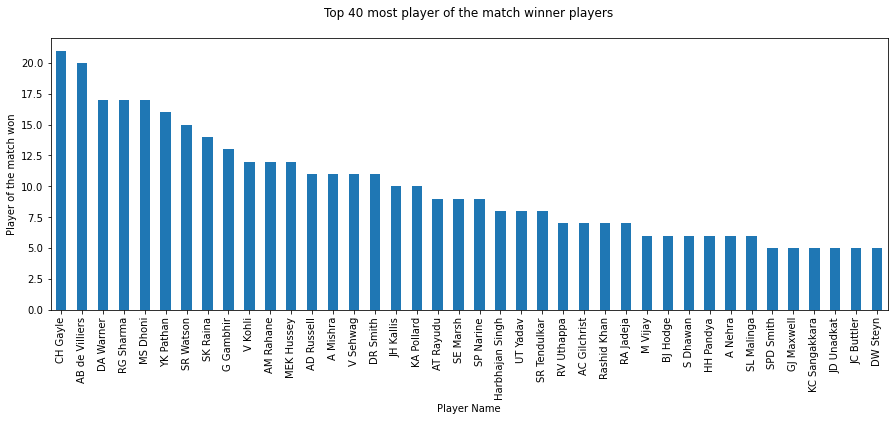

In [25]:
plt.figure(figsize=[15,5])
matches.player_of_match.value_counts()[0:40].plot(kind='bar')
plt.title('Top 40 most player of the match winner players\n')
plt.xlabel('Player Name')
plt.ylabel('Player of the match won')
plt.show()

### OBSERVATIONS
* Highest number of matches played in 'Eden Gardens' cricket stadium.
* CH Gayle has won player of the match award for the most number oof times. 
* S Ravi has umpireing most number of IPL matches.
* Mumbai Indians has played most number of IPL matches and most number of IPL matches has played in city mumbai.


In [26]:
# lets see how winning the toss impacting in winning the match 
matches['TOSS_WIN_MATCH_WIN'] = (matches.toss_winner==matches.winner)

True     388
False    355
Name: TOSS_WIN_MATCH_WIN, dtype: int64


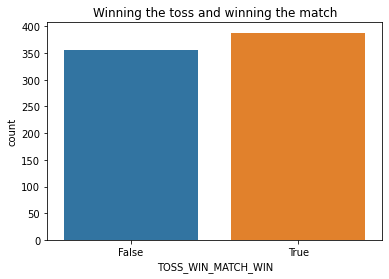

In [27]:
print(matches.TOSS_WIN_MATCH_WIN.value_counts())
sns.countplot(data=matches,x='TOSS_WIN_MATCH_WIN')
plt.title('Winning the toss and winning the match')
plt.show()

field    455
bat      288
Name: toss_decision, dtype: int64


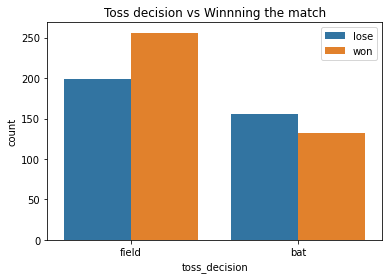

In [28]:
print(matches.toss_decision.value_counts())
sns.countplot(data=matches,x='toss_decision',hue='TOSS_WIN_MATCH_WIN')
plt.title('Toss decision vs Winnning the match')
plt.legend(title='', loc='upper right', labels=['lose', 'won'])
plt.show()

In [29]:
bat_first_total = matches[(matches.toss_decision=='bat')]['venue'].value_counts()
bat_first_win = matches[(matches.toss_decision=='bat')&(matches.TOSS_WIN_MATCH_WIN==True)]['venue'].value_counts()
bat_first_win_perc=round((bat_first_win/bat_first_total)*100,2)

field_first_total = matches[(matches.toss_decision=='field')]['venue'].value_counts()
field_first_win = matches[(matches.toss_decision=='field')&(matches.TOSS_WIN_MATCH_WIN==True)]['venue'].value_counts()
field_first_win_perc=round((field_first_win/field_first_total)*100,2)


a=pd.DataFrame(bat_first_win_perc).reset_index()
b=pd.DataFrame(field_first_win_perc).reset_index()


a.rename(columns={'index':'venue','venue':'Bat_first_win_perc'},inplace=True)
b.rename(columns={'index':'venue','venue':'field_first_win_perc'},inplace=True)

data = a.merge(b)
data.dropna(inplace=True)

data

,venue,Bat_first_win_perc,field_first_win_perc
0,ACA-VDCA Stadium,40.00,42.86
1,Barabati Stadium,100.00,60.00
2,Brabourne Stadium,66.67,60.00
3,De Beers Diamond Oval,50.00,100.00
4,Dr DY Patil Sports Academy,42.86,60.00
5,Eden Gardens,42.86,63.27
6,Feroz Shah Kotla,48.39,54.76
7,Himachal Pradesh Cricket Association Stadium,100.00,50.00
9,JSCA International Stadium Complex,33.33,75.00
10,Kingsmead,60.00,60.00


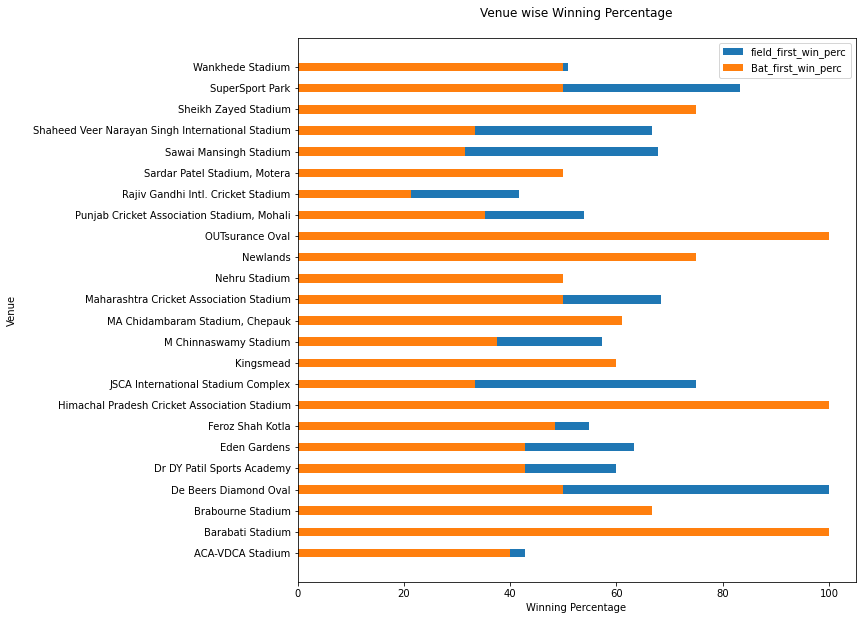

In [30]:
w=0.4
plt.figure(figsize=[10,10])
plt.barh(data.venue,data.field_first_win_perc,w,label='field_first_win_perc')
plt.barh(data.venue,data.Bat_first_win_perc,w,label='Bat_first_win_perc')
plt.legend()
plt.ylabel('Venue\n')
plt.xlabel('Winning Percentage')
plt.title('Venue wise Winning Percentage\n')
plt.show()

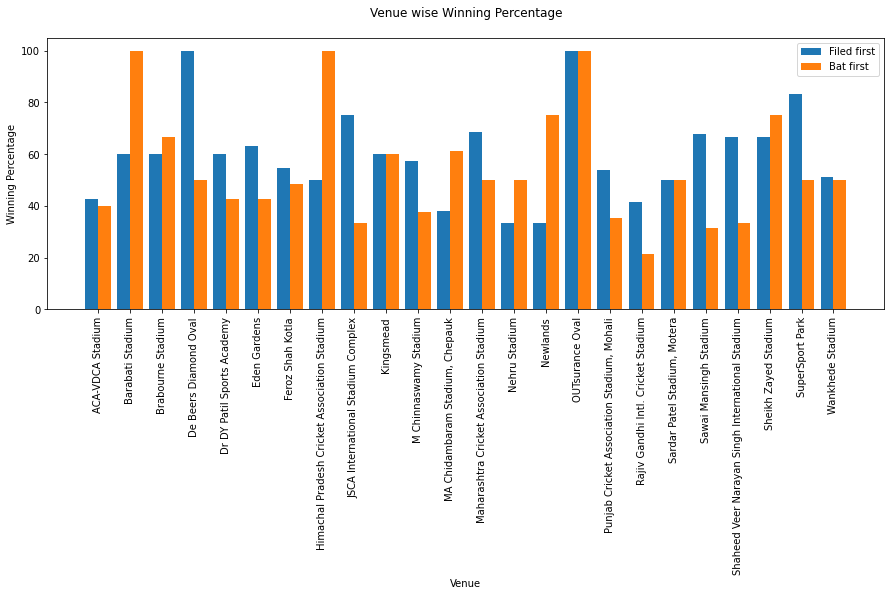

In [31]:
w=0.4
plt.figure(figsize=[15,5])

bar1=np.arange(len(data.venue))
bar2=[i+w for i in bar1]


plt.bar(bar1,data.field_first_win_perc,w,label='Filed first')
plt.bar(bar2,data.Bat_first_win_perc,w,label='Bat first')

plt.xticks(bar1+w/2,data.venue)

plt.legend()
plt.xlabel('Venue\n')
plt.ylabel('Winning Percentage')
plt.title('Venue wise Winning Percentage\n')
plt.xticks(rotation=90)
plt.show()

In [32]:
bat_first_total = matches[(matches.toss_decision=='bat')]['toss_winner'].value_counts()
bat_first_win = matches[(matches.toss_decision=='bat')&(matches.TOSS_WIN_MATCH_WIN==True)]['toss_winner'].value_counts()
bat_first_win_perc=round((bat_first_win/bat_first_total)*100,2)

field_first_total = matches[(matches.toss_decision=='field')]['toss_winner'].value_counts()
field_first_win = matches[(matches.toss_decision=='field')&(matches.TOSS_WIN_MATCH_WIN==True)]['toss_winner'].value_counts()
field_first_win_perc=round((field_first_win/field_first_total)*100,2)


a=pd.DataFrame(bat_first_win_perc).reset_index()
b=pd.DataFrame(field_first_win_perc).reset_index()


a.rename(columns={'index':'Teams','toss_winner':'Bat_first_win_perc'},inplace=True)
b.rename(columns={'index':'Teams','toss_winner':'field_first_win_perc'},inplace=True)

data = a.merge(b)
data.fillna(0,inplace=True)

data

,Teams,Bat_first_win_perc,field_first_win_perc
0,Chennai Super Kings,62.50,65.85
1,Deccan Chargers,45.83,42.11
2,Delhi Capitals,50.00,71.43
3,Delhi Daredevils,39.29,47.06
4,Gujarat Lions,0.00,71.43
5,Kings XI Punjab,23.08,51.85
6,Kochi Tuskers Kerala,0.00,80.00
7,Kolkata Knight Riders,51.72,61.29
8,Mumbai Indians,58.14,58.49
9,Pune Warriors,27.27,0.00


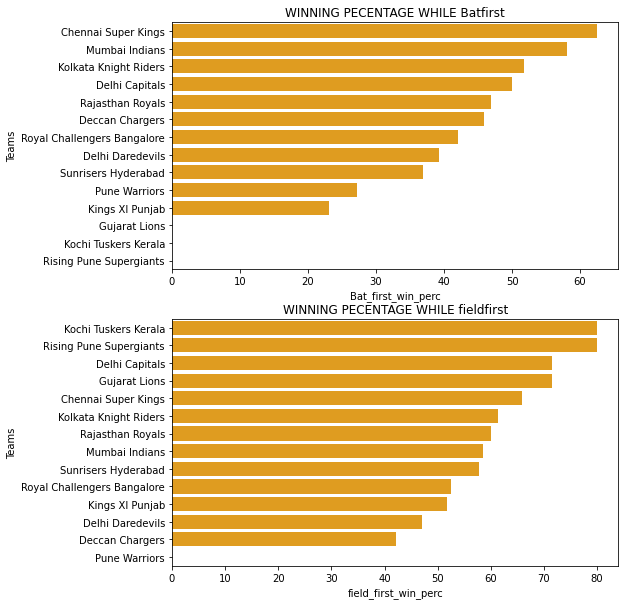

In [33]:
fig, ax = plt.subplots(2,1, figsize = (8,10))
counter=0
for i in ['Bat_first_win_perc','field_first_win_perc']:
    s=''.join(i.split('_')[0:2])
    trace_x = counter // 1
    trace_y = counter % 1
    chart=sns.barplot(x=i,y='Teams',ax=ax[trace_x],data=data.sort_values(i,ascending=False),color="Orange") 
    chart.set(title = f'WINNING PECENTAGE WHILE {s}')
    counter+=1

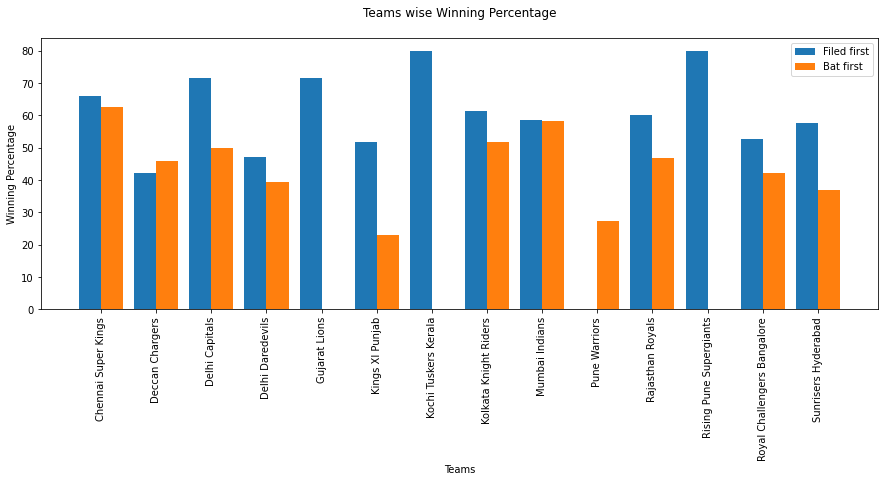

In [34]:
w=0.4
plt.figure(figsize=[15,5])

bar1=np.arange(len(data.Teams))
bar2=[i+w for i in bar1]


plt.bar(bar1,data.field_first_win_perc,w,label='Filed first')
plt.bar(bar2,data.Bat_first_win_perc,w,label='Bat first')

plt.xticks(bar1+w/2,data.Teams)

plt.legend()
plt.xlabel('Teams\n')
plt.ylabel('Winning Percentage')
plt.title('Teams wise Winning Percentage\n')
plt.xticks(rotation=90)
plt.show()

# Lets analyse Deliveries dataset

In [35]:
deliveries = pd.read_csv(r'E:\spark foundation\Indian Premier League\deliveries.csv')
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [36]:
deliveries.shape

(179078, 21)

In [37]:
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [38]:
deliveries.dtypes

match_id             int64
inning               int64
batting_team        object
bowling_team        object
over                 int64
ball                 int64
batsman             object
non_striker         object
bowler              object
is_super_over        int64
wide_runs            int64
bye_runs             int64
legbye_runs          int64
noball_runs          int64
penalty_runs         int64
batsman_runs         int64
extra_runs           int64
total_runs           int64
player_dismissed    object
dismissal_kind      object
fielder             object
dtype: object

In [39]:
# replace 'Rising Pune Supergiant', 'Rising Pune Supergiants' to 'Rising Pune Supergiants' 
columns = ['batting_team','bowling_team']
for i in columns:
    deliveries[i] = deliveries[i].replace(['Rising Pune Supergiant', 'Rising Pune Supergiants'],'Rising Pune Supergiants')

In [40]:
# replacing the null with 'No wicket' for player_dismissed and dismissal_kind column 
deliveries.player_dismissed = deliveries.player_dismissed.fillna('No wicket')
deliveries.dismissal_kind = deliveries.dismissal_kind.fillna('No wicket')

In [41]:
# make a table which contain data releted to batting 
a = pd.pivot_table(data=deliveries,index='batsman',values=['batsman_runs','match_id']
              ,aggfunc={'batsman_runs':'sum','match_id':pd.Series.nunique}).reset_index()
b = deliveries.batsman.value_counts().reset_index()
b.rename(columns = {'index':'batsman','batsman':'ball_faced'},inplace=True)
data = a.merge(b,on='batsman')
data.rename(columns={'batsman':'Batsman','batsman_runs':'Total run','match_id':'matches played',
                    'ball_faced':'Ball faced'},inplace=True)
data['Batting Average'] = round(data['Total run']/data['matches played'],2)
data['Strik Rate'] = round((data['Total run']/data['Ball faced'])*100,2) 
data.head()

,Batsman,Total run,matches played,Ball faced,Batting Average,Strik Rate
0,A Ashish Reddy,280,23,196,12.17,142.86
1,A Chandila,4,2,7,2.00,57.14
2,A Chopra,53,6,75,8.83,70.67
3,A Choudhary,25,3,20,8.33,125.00
4,A Dananjaya,4,1,5,4.00,80.00


In [42]:
# taking only those batsman who played atleast 50 matches
Topbatsman = data[data['matches played']>=50].reset_index(drop=True)
Topbatsman.head()

,Batsman,Total run,matches played,Ball faced,Batting Average,Strik Rate
0,A Mishra,368,54,410,6.81,89.76
1,AB de Villiers,4428,142,2977,31.18,148.74
2,AC Gilchrist,2069,80,1555,25.86,133.05
3,AD Russell,1445,52,803,27.79,179.95
4,AJ Finch,1744,73,1372,23.89,127.11


           Batsman  Total run  Strik Rate
67         V Kohli       5434      129.04
57        SK Raina       5415      133.90
50       RG Sharma       4914      128.77
13       DA Warner       4741      139.52
54        S Dhawan       4632      122.67
11        CH Gayle       4560      145.64
40        MS Dhoni       4477      134.93
52      RV Uthappa       4446      127.32
1   AB de Villiers       4428      148.74
19       G Gambhir       4223      119.84


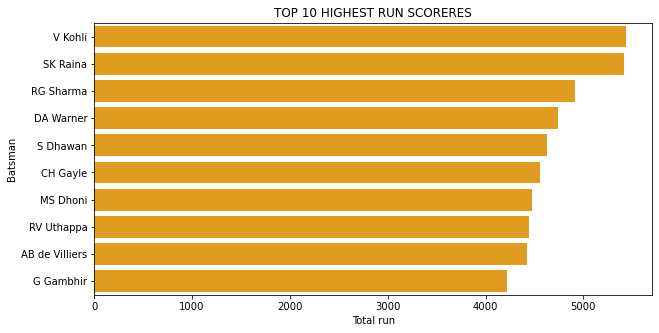

In [43]:
# lets find out highest run getter in IPL
print(Topbatsman[['Batsman','Total run','Strik Rate']].sort_values('Total run',ascending=False)[0:10])
plt.figure(figsize=[10,5])
sns.barplot(data=Topbatsman.sort_values('Total run',ascending=False)[0:10],x='Total run',y='Batsman',color="Orange")
plt.title('TOP 10 HIGHEST RUN SCORERES')
plt.show()

           Batsman  Total run  Strik Rate
3       AD Russell       1445      179.95
58       SP Narine        803      166.94
51         RR Pant       1792      162.32
20      GJ Maxwell       1403      155.54
21       HH Pandya       1118      151.90
68        V Sehwag       2728      148.83
1   AB de Villiers       4428      148.74
11        CH Gayle       4560      145.64
27      KA Pollard       2784      141.75
13       DA Warner       4741      139.52


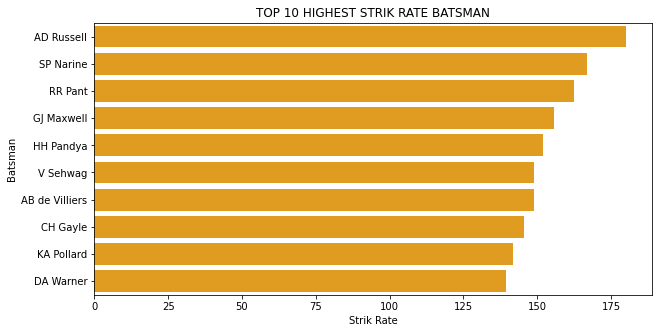

In [44]:
# lets find out highest Strik Rate in IPL
print(Topbatsman[['Batsman','Total run','Strik Rate']].sort_values('Strik Rate',ascending=False)[0:10])
plt.figure(figsize=[10,5])
sns.barplot(data=Topbatsman.sort_values('Strik Rate',ascending=False)[0:10],x='Strik Rate',y='Batsman',color="Orange")
plt.title('TOP 10 HIGHEST STRIK RATE BATSMAN')
plt.show()

In [45]:
# make a new column wickets 
deliveries['Wicket']=deliveries.player_dismissed.apply(lambda x:0 if x=='No wicket' else 1)

In [46]:
wickets = deliveries[~(deliveries.dismissal_kind.isin(['obstructing the field','run out','retired hurt']))]
wickets = wickets[wickets.is_super_over==0]

b = pd.pivot_table(data=wickets,index='bowler',aggfunc={'match_id':pd.Series.nunique}).reset_index() 
b.rename(columns={'bowler':'Bowler','match_id':'Matches played'},inplace=True)

summary = wickets.groupby(['match_id','bowler']).agg({"over": pd.Series.nunique,\
                                                         'total_runs':'sum',\
                                                     'Wicket':'sum'}).reset_index()
a = pd.pivot_table(index='bowler',aggfunc={'over':'sum','total_runs':'sum','Wicket':'sum'},data=summary).reset_index()
a['Economy Rate'] = round((a.total_runs/a.over),2)
a.rename(columns={'bowler':'Bowler','over':'Overs Bowled','total_runs':'Runs conceded'},inplace=True)

data = a.merge(b,on='Bowler') 
data['Wicket Average'] = round((data.Wicket/data['Matches played']),2) 
data.head()

,Bowler,Wicket,Overs Bowled,Runs conceded,Economy Rate,Matches played,Wicket Average
0,A Ashish Reddy,18,45,400,8.89,20,0.90
1,A Chandila,11,39,245,6.28,12,0.92
2,A Choudhary,5,17,144,8.47,5,1.00
3,A Dananjaya,0,4,48,12.00,1,0.00
4,A Flintoff,2,11,106,9.64,3,0.67


In [47]:
# lets take only those player who played minimum 50 matches 
Topbowlers = data[data['Matches played']>50].sort_values('Economy Rate',ascending=True) 
Topbowlers.head()

,Bowler,Wicket,Overs Bowled,Runs conceded,Economy Rate,Matches played,Wicket Average
347,SP Narine,122,428,2922,6.83,109,1.12
207,M Muralitharan,63,255,1755,6.88,66,0.95
269,R Ashwin,125,489,3385,6.92,136,0.92
108,DW Steyn,96,352,2438,6.93,92,1.04
126,Harbhajan Singh,150,563,4047,7.19,157,0.96


              Bowler  Wicket
340       SL Malinga     170
7           A Mishra     156
126  Harbhajan Singh     150
264        PP Chawla     149
93          DJ Bravo     147
53           B Kumar     133
269         R Ashwin     125
347        SP Narine     122
381         UT Yadav     119
282        RA Jadeja     108


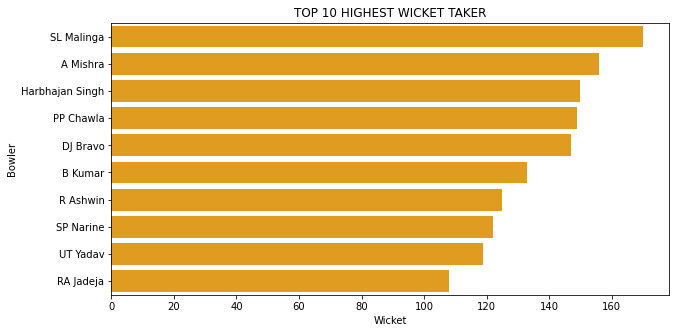

In [48]:
# Now lets find top 10 highest wicket taker in IPL 
print(Topbowlers[['Bowler','Wicket']].sort_values('Wicket',ascending=False)[0:10])
plt.figure(figsize=[10,5])
sns.barplot(data=Topbowlers.sort_values('Wicket',ascending=False)[0:10],x='Wicket',y='Bowler',color="Orange")
plt.title('TOP 10 HIGHEST WICKET TAKER')
plt.show()

              Bowler  Economy Rate
347        SP Narine          6.83
207   M Muralitharan          6.88
269         R Ashwin          6.92
108         DW Steyn          6.93
126  Harbhajan Singh          7.19
174        KH Pandya          7.29
340       SL Malinga          7.33
337         SK Raina          7.34
202         M Kartik          7.36
339         SK Warne          7.36


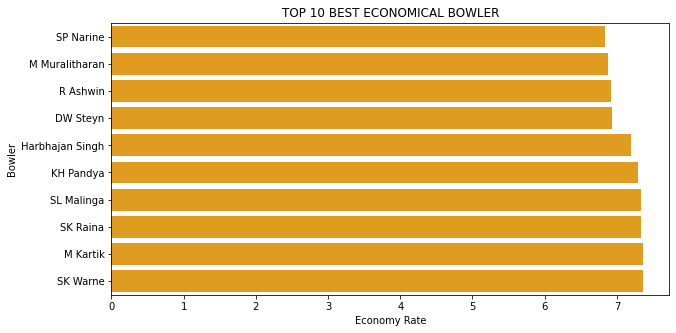

In [49]:
# Now lets find top 20 highest wicket taker in IPL 
print(Topbowlers[['Bowler','Economy Rate']].sort_values('Economy Rate')[0:10])
plt.figure(figsize=[10,5])
sns.barplot(data=Topbowlers.sort_values('Economy Rate')[0:10],x='Economy Rate',y='Bowler',color="Orange")
plt.title('TOP 10 BEST ECONOMICAL BOWLER')
plt.show()

In [50]:
#death over speacialist
wickets = wickets[wickets.over.isin([16,17,18,19,20])]
b = pd.pivot_table(data=wickets,index='bowler',aggfunc={'match_id':pd.Series.nunique}).reset_index() 
b.rename(columns={'bowler':'Bowler','match_id':'Matches played'},inplace=True)

summary = wickets.groupby(['match_id','bowler']).agg({"over": pd.Series.nunique,\
                                                         'total_runs':'sum',\
                                                     'Wicket':'sum'}).reset_index()
a = pd.pivot_table(index='bowler',aggfunc={'over':'sum','total_runs':'sum','Wicket':'sum'},data=summary).reset_index()
a['Economy Rate'] = round((a.total_runs/a.over),2)
a.rename(columns={'bowler':'Bowler','over':'Overs Bowled','total_runs':'Runs conceded'},inplace=True)

data = a.merge(b,on='Bowler') 
data['Wicket Average'] = round((data.Wicket/data['Matches played']),2) 
data.head()

,Bowler,Wicket,Overs Bowled,Runs conceded,Economy Rate,Matches played,Wicket Average
0,A Ashish Reddy,11,18,169,9.39,13,0.85
1,A Chandila,0,1,6,6.00,1,0.00
2,A Choudhary,1,4,40,10.00,3,0.33
3,A Flintoff,1,4,59,14.75,2,0.50
4,A Joseph,4,2,14,7.00,1,4.00


            Bowler  Wicket  Economy Rate
286     SL Malinga     108          7.93
80        DJ Bravo      90          9.40
47         B Kumar      78          9.01
293      SP Narine      57          7.63
8          A Nehra      54          8.98
94        DW Steyn      49          8.12
322       UT Yadav      49         10.54
130      JJ Bumrah      47          9.28
239  R Vinay Kumar      47         10.32
248       RP Singh      45          9.16


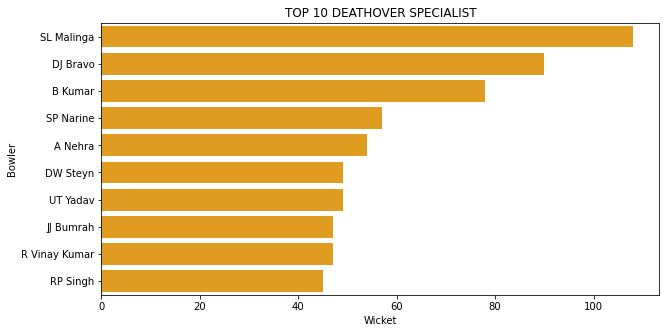

In [51]:
# lets take only those bowlers who played atleast 50 matches and sort them acccoding to Wickettaken
deathoverspe = data[data['Matches played']>=50].sort_values(['Wicket','Economy Rate'],ascending=[False,True])
print(deathoverspe[['Bowler','Wicket','Economy Rate']][0:10])
plt.figure(figsize=[10,5])
sns.barplot(data=deathoverspe[0:10],x='Wicket',y='Bowler',color="Orange")
plt.title('TOP 10 DEATHOVER SPECIALIST')
plt.show() 

CH Gayle          327
AB de Villiers    214
MS Dhoni          207
SK Raina          195
RG Sharma         194
V Kohli           191
DA Warner         181
SR Watson         177
KA Pollard        175
YK Pathan         161
Name: batsman, dtype: int64


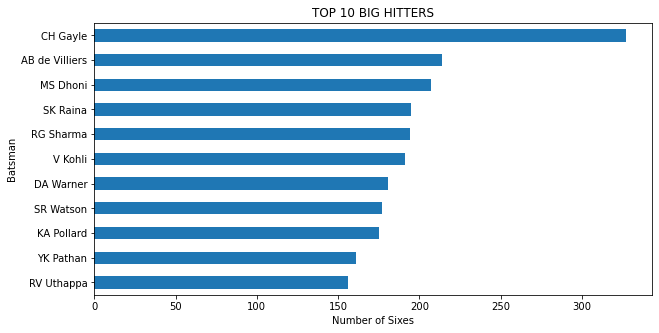

In [52]:
print(deliveries[deliveries.batsman_runs==6].batsman.value_counts()[0:10])
plt.figure(figsize=[10,5])
deliveries[deliveries.batsman_runs==6].batsman.value_counts().sort_values()[-11::1].plot(kind='barh')
plt.title('TOP 10 BIG HITTERS')
plt.xlabel('Number of Sixes')
plt.ylabel('Batsman')
plt.show()

In [53]:
fielding = deliveries[deliveries.dismissal_kind.isin(['caught','run out'])]
a = pd.DataFrame(fielding[fielding.dismissal_kind=='caught'].fielder.value_counts()).reset_index()
a.rename(columns={'index':'Fielder','fielder':'Catches'},inplace=True) 
b = pd.DataFrame(fielding[fielding.dismissal_kind=='run out'].fielder.value_counts()).reset_index()
b.rename(columns={'index':'Fielder','fielder':'Run-outs'},inplace=True) 
data = a.merge(b,on='Fielder',how='inner') 
data.head()

,Fielder,Catches,Run-outs
0,KD Karthik,109,14
1,SK Raina,99,16
2,MS Dhoni,98,23
3,AB de Villiers,93,14
4,RV Uthappa,84,9


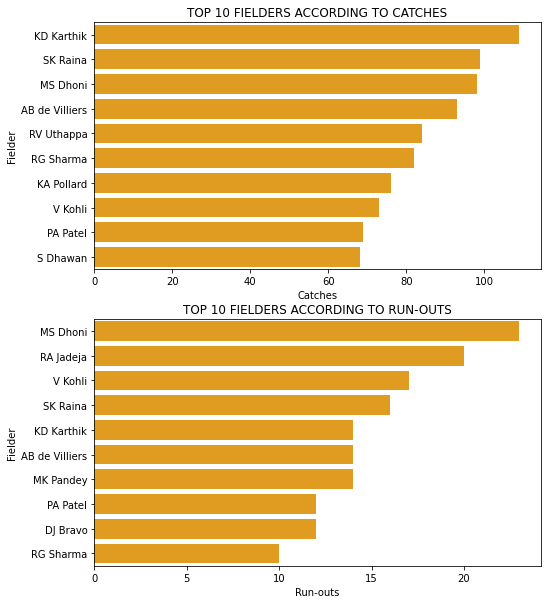

In [54]:
fig, ax = plt.subplots(2,1, figsize = (8,10))
counter=0
for i in ['Catches','Run-outs']:
    #s=''.join(i.split('_')[0:2])
    trace_x = counter // 1
    trace_y = counter % 1
    chart=sns.barplot(x=i,y='Fielder',ax=ax[trace_x],data=data.sort_values(i,ascending=False)[0:10],color="Orange") 
    chart.set(title = f'TOP 10 FIELDERS ACCORDING TO {i.upper()}')
    counter+=1 

MS Dhoni         38
RV Uthappa       32
KD Karthik       29
WP Saha          18
PA Patel         16
AC Gilchrist     16
NV Ojha          10
RR Pant           9
KC Sangakkara     9
Q de Kock         8
Name: fielder, dtype: int64


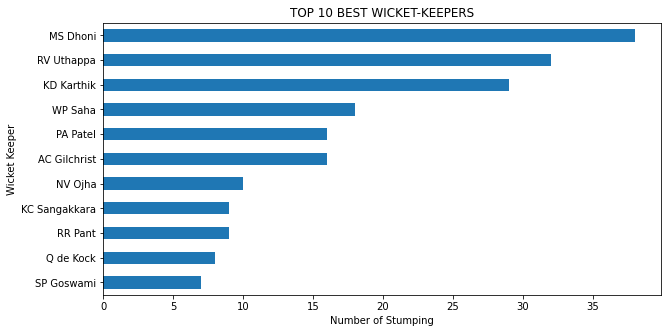

In [55]:
#lets see the top 10 wicket keepers 
print(deliveries[deliveries.dismissal_kind=='stumped'].fielder.value_counts()[0:10])
plt.figure(figsize=[10,5])
deliveries[deliveries.dismissal_kind=='stumped'].fielder.value_counts().sort_values()[-11::1].plot(kind='barh')
plt.title('TOP 10 BEST WICKET-KEEPERS')
plt.xlabel('Number of Stumping')
plt.ylabel('Wicket Keeper')
plt.show()

# SUMMARY 

**_1.Chennai Super Kings is the only team having winning percentage higher then 60% while bat first and bowl first._**

**_2.V Kohli is the highest run scores in IPL followed by SK Raina, RG Sharma and DA Warner._**

**_3.AD Russell having best batting strik rate of 179.95 followed by SP Narine, RR Pant and GJ Maxwell._**

**_4.SL Malinga taking highest wickets in IPL followed by A Mishra, Harbhajan Singh and PP Chawla._**

**_5.SL Malinga, DJ Bravo, B Kumar, SP Narine and A Nehra are some deathover speacialist bowlers._**

**_6.SP Narine, M Muralitharan, R Ashwin and DW Steyn are some bowlers whose economy rate was less then 7._** 

**_7.CH Gayle hitting highest number of sixes in IPL followed by AB de Villiers and MS Dhoni._** 

**_8.KD Karthik takes highest number of catches in IPL followed by SK Raina, MS Dhoni and AB de Villiers._** 

**_9.MS Dhoni, RA Jadeja, V Kohli, SK Raina	are some best fielders according to runouts they did._**

**_10.MS Dhoni is the best wicket keeper according to stumping._**

